# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

#### Display the top 5 rows in the data

In [10]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-17-2020.csv'
covid = pd.read_csv(url)
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-18 04:33:18,34.223334,-82.461707,73,0,0,73,"Abbeville, South Carolina, US",297.631182,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-18 04:33:18,30.295065,-92.414197,625,32,0,593,"Acadia, Louisiana, US",1007.333387,5.120000
2,51001.0,Accomack,Virginia,US,2020-06-18 04:33:18,37.767072,-75.632346,1018,14,0,1004,"Accomack, Virginia, US",3150.142344,1.375246
3,16001.0,Ada,Idaho,US,2020-06-18 04:33:18,43.452658,-116.241552,986,22,0,964,"Ada, Idaho, US",204.739746,2.231237
4,19001.0,Adair,Iowa,US,2020-06-18 04:33:18,41.330756,-94.471059,12,0,0,12,"Adair, Iowa, US",167.785235,0.000000


#### Show the information of the dataset

In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3784 entries, 0 to 3783
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3068 non-null   float64
 1   Admin2               3072 non-null   object 
 2   Province_State       3607 non-null   object 
 3   Country_Region       3784 non-null   object 
 4   Last_Update          3784 non-null   object 
 5   Lat                  3707 non-null   float64
 6   Long_                3707 non-null   float64
 7   Confirmed            3784 non-null   int64  
 8   Deaths               3784 non-null   int64  
 9   Recovered            3784 non-null   int64  
 10  Active               3784 non-null   int64  
 11  Combined_Key         3784 non-null   object 
 12  Incidence_Rate       3707 non-null   float64
 13  Case-Fatality_Ratio  3718 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 414.0+ KB


#### Show the sum of missing values of features in the dataset

In [12]:
covid.isna().sum()

FIPS                   716
Admin2                 712
Province_State         177
Country_Region           0
Last_Update              0
Lat                     77
Long_                   77
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incidence_Rate          77
Case-Fatality_Ratio     66
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [13]:
covid.loc[:,['Country_Region','Confirmed']].groupby('Country_Region').sum().reset_index()

,Country_Region,Confirmed
0,Afghanistan,26960
1,Albania,1722
2,Algeria,11268
3,Andorra,854
4,Angola,155
...,...,...
192,West Bank and Gaza,555
193,Winter Olympics 2022,0
194,Yemen,902
195,Zambia,1412


#### Show the number of Deaths by Country

In [14]:
covid.loc[:,['Country_Region','Deaths']].groupby('Country_Region').sum().reset_index()

,Country_Region,Deaths
0,Afghanistan,508
1,Albania,38
2,Algeria,799
3,Andorra,52
4,Angola,7
...,...,...
192,West Bank and Gaza,3
193,Winter Olympics 2022,0
194,Yemen,244
195,Zambia,11


#### Show the number of Recovered cases by Country

In [15]:
covid.loc[:,['Country_Region','Recovered']].groupby('Country_Region').sum().reset_index()

,Country_Region,Recovered
0,Afghanistan,6158
1,Albania,1077
2,Algeria,7943
3,Andorra,791
4,Angola,64
...,...,...
192,West Bank and Gaza,415
193,Winter Olympics 2022,0
194,Yemen,271
195,Zambia,1142


#### Show the number of Active Cases by Country

In [17]:
covid.loc[:,['Country_Region','Active']].groupby('Country_Region').sum().reset_index()

,Country_Region,Active
0,Afghanistan,20294
1,Albania,607
2,Algeria,2526
3,Andorra,11
4,Angola,84
...,...,...
192,West Bank and Gaza,137
193,Winter Olympics 2022,0
194,Yemen,387
195,Zambia,259


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [18]:
covid.loc[:,['Country_Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']].groupby('Country_Region').sum().reset_index()

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,26960,508,6158,20294
1,Albania,1722,38,1077,607
2,Algeria,11268,799,7943,2526
3,Andorra,854,52,791,11
4,Angola,155,7,64,84
...,...,...,...,...,...
192,West Bank and Gaza,555,3,415,137
193,Winter Olympics 2022,0,0,0,0
194,Yemen,902,244,271,387
195,Zambia,1412,11,1142,259


### Question 3

### Show the countries with no recovered cases

In [19]:
covid_recovered = covid.loc[:,['Country_Region','Recovered']].groupby('Country_Region').sum().reset_index()
covid_recovered[covid_recovered['Recovered']==0]

,Country_Region,Recovered
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
107,MS Zaandam,0
124,Nauru,0
135,Palau,0
150,Samoa,0
167,Summer Olympics 2020,0
169,Sweden,0
178,Tonga,0


#### Show the countries with no confirmed cases

In [20]:
covid_recovered = covid.loc[:,['Country_Region','Confirmed']].groupby('Country_Region').sum().reset_index()
covid_recovered[covid_recovered['Confirmed']==0]

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
124,Nauru,0
135,Palau,0
150,Samoa,0
167,Summer Olympics 2020,0
178,Tonga,0
182,Tuvalu,0
193,Winter Olympics 2022,0


#### Show the countries with no deaths

In [21]:
covid_recovered = covid.loc[:,['Country_Region','Deaths']].groupby('Country_Region').sum().reset_index()
covid_recovered[covid_recovered['Deaths']==0]

,Country_Region,Deaths
5,Antarctica,0
20,Bhutan,0
31,Cambodia,0
51,Dominica,0
57,Eritrea,0
61,Fiji,0
70,Grenada,0
76,Holy See,0
92,Kiribati,0
93,"Korea, North",0


In [22]:
covid_recovered = covid.loc[:,['Country_Region', 'Confirmed', 'Deaths', 'Recovered']].groupby('Country_Region').sum().reset_index()
covid_recovered[covid_recovered['Deaths']==0]

,Country_Region,Confirmed,Deaths,Recovered
5,Antarctica,0,0,0
20,Bhutan,67,0,24
31,Cambodia,128,0,126
51,Dominica,18,0,16
57,Eritrea,131,0,39
61,Fiji,18,0,18
70,Grenada,23,0,22
76,Holy See,12,0,12
92,Kiribati,0,0,0
93,"Korea, North",0,0,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [23]:
countries_confirmed = covid.loc[:, ['Country_Region','Last_Update','Confirmed','Deaths','Recovered']].groupby('Country_Region').sum().sort_values('Confirmed', ascending=False)[0:10]
countries_confirmed

,Confirmed,Deaths,Recovered
Country_Region,,,
US,2167482,117583,592191
Brazil,961230,46707,521046
Russia,552549,7468,303800
India,366946,12237,194325
United Kingdom,300711,55175,1304
Spain,244683,27136,150376
Peru,240908,30840,128622
Italy,237828,34448,179455
Chile,220628,3615,181931


#### Show the Top 10 Countries with Active cases

In [24]:
countries_confirmed = covid.loc[:, ['Country_Region','Last_Update','Confirmed','Deaths','Recovered', 'Active']].groupby('Country_Region').sum().sort_values('Active', ascending=False)[0:10]
countries_confirmed

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,2167482,117583,592191,2048278
Brazil,961230,46707,521046,387821
United Kingdom,300711,55175,1304,257175
Russia,552549,7468,303800,241281
Chile,220628,3615,181931,217013
Peru,240908,30840,128622,210068
India,366946,12237,194325,160384
Pakistan,160118,3093,59215,97810
France,197527,29578,73791,94158


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [25]:
import matplotlib.pyplot as plt

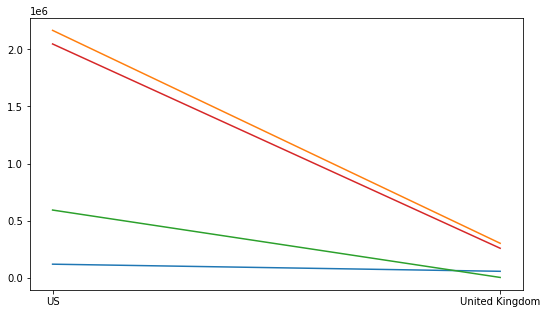

In [33]:
covid_plot = covid.loc[:, ['Country_Region','Deaths','Confirmed','Recovered', 'Active']].groupby('Country_Region').sum().sort_values('Deaths', ascending=False)
covid_plot = covid_plot[covid_plot['Deaths']>50000]


fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(131)
ax.plot(covid_plot)

### Question 6

### Plot Province/State wise Deaths in USA

In [30]:
import plotly.express as px

In [31]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [34]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [40]:
covid_us = covid_data[covid_data['Country_Region'] == 'US']
covid_us

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
649,1001.0,Autauga,Alabama,US,2021-01-10 05:22:12,32.539527,-86.644082,4847,53,0,4794,"Autauga, Alabama, US",8675.651972,1.093460
650,1003.0,Baldwin,Alabama,US,2021-01-10 05:22:12,30.727750,-87.722071,15202,173,0,15029,"Baldwin, Alabama, US",6809.894550,1.138008
651,1005.0,Barbour,Alabama,US,2021-01-10 05:22:12,31.868263,-85.387129,1648,35,0,1613,"Barbour, Alabama, US",6675.848659,2.123786
652,1007.0,Bibb,Alabama,US,2021-01-10 05:22:12,32.996421,-87.125115,2038,48,0,1990,"Bibb, Alabama, US",9100.651960,2.355250
653,1009.0,Blount,Alabama,US,2021-01-10 05:22:12,33.982109,-86.567906,5047,77,0,4970,"Blount, Alabama, US",8727.907862,1.525659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,90056.0,Unassigned,Wyoming,US,2021-01-10 05:22:12,NaN,NaN,0,0,0,0,"Unassigned, Wyoming, US",NaN,NaN
3921,56043.0,Washakie,Wyoming,US,2021-01-10 05:22:12,43.904516,-107.680187,800,21,0,779,"Washakie, Wyoming, US",10249.839846,2.625000
3922,56045.0,Weston,Wyoming,US,2021-01-10 05:22:12,43.839612,-104.567488,485,4,0,481,"Weston, Wyoming, US",7001.587989,0.824742
3977,2066.0,Copper River,Alaska,US,2021-04-02 15:13:53,60.388600,-162.890520,169,0,0,169,"Copper River, Alaska, US",6261.578362,0.000000


### Question 7

### Plot Province/State Wise Active Cases in USA

In [50]:
covid_province_us = covid_us.loc[:, ['Province_State', 'Active']].groupby('Province_State').sum()
px.bar(covid_province_us.reset_index(), x='Province_State', y='Active', title='State wise active cases of COVID-19 in USA', text='Active')

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [52]:
covid_province_us = covid_us.loc[:, ['Province_State', 'Confirmed']].groupby('Province_State').sum()
px.bar(covid_province_us.reset_index(), x='Province_State', y='Confirmed', title='State wise active cases of COVID-19 in USA', text='Confirmed')

### Question 9

### Plot Worldwide Confirmed Cases over time

In [ ]:
import plotly.express as px
import plotly.io as pio

In [53]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [55]:
covid_worldwide = covid_data.loc[: ,['Last_Update', 'Confirmed']].groupby('Last_Update').sum().reset_index()
px.line(covid_worldwide, x='Last_Update', y='Confirmed', title = 'Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time')